# Representation

## Crucial questions
* How can data be represented in order to be understood by the computer?
* Can I find a probabilistic model to describe all my knowledge and train a machine on inference?

## In practice
* start simple
* exploratory data analysis often useful

## Often useful
* study common benchmark examples and see how you are performing

### Handwritten digits

<img src="figures/mnist.png" width="50%">

### Iris flowers with three types
Iris Setosa

<img src="figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">


# SKLEARN

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

Each sample (data point) is a row in the data array, and each feature is a column.

* standard library for ML in Python
* rich library and fairly easy to use
* largely implemented in Cython or on native C code, so fairly fast
* use the following cheat sheet

<img src="figures/sklearn.png" width="100%">






In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [3]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


In [ ]:
print(iris.data.shape)
print(iris.target.shape)

In [ ]:
print(iris.target)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

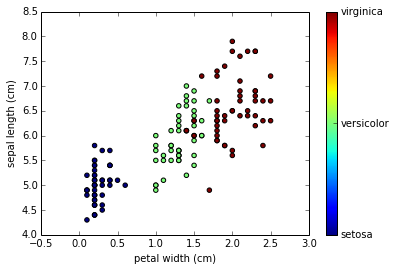

In [5]:
x_index = 3
y_index = 0

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

# EXERCISE !!! Can you change x and y so that irises are maximally seperated?

Note: preview for dimensionality reduction

In [6]:
# see some implemented data to play with
from sklearn import datasets
from sklearn.datasets import get_data_home
get_data_home()

'/home/julius/scikit_learn_data'

#MNIST DIGITS

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [9]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [10]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


In [11]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


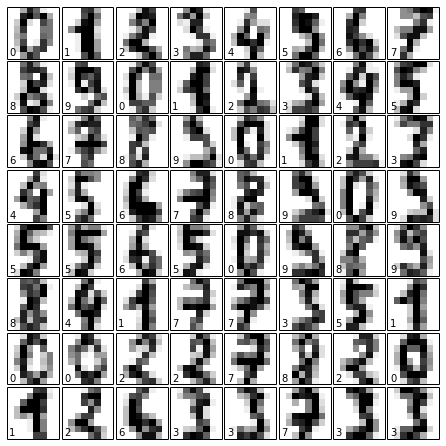

In [12]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We see now what the features mean.  Each feature is a real-valued quantity representing the
darkness of a pixel in an 8x8 image of a hand-written digit.

Even though each sample has data that is inherently two-dimensional, the data matrix flattens
this 2D data into a **single vector**, which can be contained in one **row** of the data matrix.

# NONLINEAR DATA ? see here ...

In [13]:
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)
print(data.shape)
print(colors.shape)

(1000, 3)
(1000,)


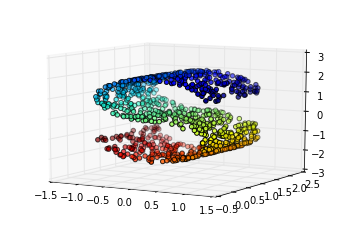

In [14]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.view_init(10, -60)

# EXERCISE !!! Can you  load and explore the following dataset?

In [16]:
from sklearn.datasets import fetch_olivetti_faces